# 1. Import Library

# 資料準備

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
import re
re_tag = re.compile(r'<[^>]+>')

def rm_tags(text):
    return re_tag.sub('', text)

In [5]:
import os
def read_files(filetype):
    path = "data/aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
        
    print('read',filetype, 'files:',len(file_list))
       
    all_labels = ([1] * 12500 + [0] * 12500) 
    
    all_texts  = []
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_labels,all_texts

In [6]:
y_train,train_text=read_files("train")

read train files: 25000


In [7]:
y_test,test_text=read_files("test")

read test files: 25000


In [8]:
#先讀取所有文章建立字典，限制字典的數量為nb_words=5000

In [9]:
token = Tokenizer(num_words=5000)
token.fit_on_texts(train_text)

In [10]:
#將文字轉為數字序列

In [11]:
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq  = token.texts_to_sequences(test_text)

In [12]:
#截長補短，讓所有影評所產生的數字序列長度一樣

In [13]:
x_train = sequence.pad_sequences(x_train_seq, maxlen=400)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=400)

# 建立模型

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [15]:
model = Sequential()

In [16]:
model.add(Embedding(output_dim=100,
                    input_dim=5000, 
                    input_length=400))


In [17]:
model.add(LSTM(20))
model.add(Dropout(0.5))
model.add(Dense(units=1,
                activation='sigmoid' ))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 100)          500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                9680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 509,701
Trainable params: 509,701
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [19]:
model.compile(loss='binary_crossentropy', 
              #optimizer='rmsprop', 
              optimizer='adagrad', 
              metrics=['accuracy'])

In [20]:
train_history =model.fit(x_train, y_train,batch_size=100, 
                         epochs=5,verbose=2,
                         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
111s - loss: 0.4710 - acc: 0.7855 - val_loss: 0.5833 - val_acc: 0.7938
Epoch 2/5
107s - loss: 0.3140 - acc: 0.8846 - val_loss: 0.4769 - val_acc: 0.8510
Epoch 3/5
106s - loss: 0.2591 - acc: 0.9096 - val_loss: 0.4386 - val_acc: 0.8550
Epoch 4/5
109s - loss: 0.2230 - acc: 0.9240 - val_loss: 0.5785 - val_acc: 0.7980
Epoch 5/5
113s - loss: 0.1939 - acc: 0.9372 - val_loss: 0.5174 - val_acc: 0.8250


In [21]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


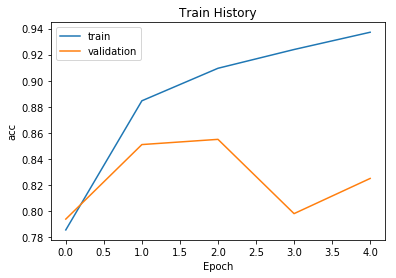

In [22]:
show_train_history(train_history,'acc','val_acc')

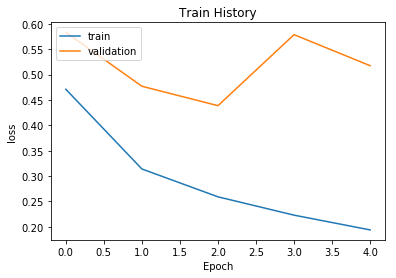

In [23]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

24992/25000 [============================>.] - ETA: 0s

0.86631999999999998

In [25]:
predict=model.predict_classes(x_test)
predict_classes=predict.reshape(25000)

24992/25000 [============================>.] - ETA: 0s

In [26]:
import pandas as pd
import numpy as np

prediction = model.predict_classes(x_test)
y_test = np.array(y_test)
print(y_test.shape)

pd.crosstab(y_test, predict_classes, rownames=['label'], colnames=['predict'])

24992/25000 [============================>.] - ETA: 0s(25000,)


predict,0,1
label,,
0,10291,2209
1,1133,11367
